In [60]:
import pickle
import pandas as pd
import numpy as np
from psm_causal_effects import psm_causal_effects
from extract_remove_nans import extract_remove_nans
import statsmodels.api as sm 
import statsmodels.formula.api as smf

n_min_samples = 20

# read data
with open('data.dat') as f:
    data, subjects = pickle.load(f)
f.close()

n_boot = 10

ind_set = range(len(data))

beta_m2s_mean = np.zeros([n_boot,4])
beta_s2m_mean = np.zeros([n_boot,4])
beta_s2m_pw_mean = np.zeros([n_boot, 1])
beta_m2s_pw_mean = np.zeros([n_boot, 1])
    

for k in range(n_boot):
    
    print k,
    
    inds = np.random.choice(ind_set, size=len(data), replace=True)

    beta_m2s = np.ones([len(inds),4])*np.nan
    beta_s2m = np.ones([len(inds),4])*np.nan
    beta_m2s_pw = np.ones([len(inds),1])*np.nan
    beta_s2m_pw = np.ones([len(inds),1])*np.nan
    
    for (c,i) in enumerate(inds):
        
        
        # mood on sleep - pairwise
        treatment = 'mood_prev'
        outcome = 'quality'
        data_s = extract_remove_nans(data[i], [treatment,outcome])
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment, data_s)
        mdf = md.fit()
        beta_m2s_pw[c] = mdf.params.mood_prev
        
        # mood on sleep - lag 0
        #confound = ['act_prev','stress_prev','energy_prev','daytype']
        confound = ['act_prev','daytype']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_m2s[c,0] = mdf.params.mood_prev

        # mood on sleep - lag 1
        #confound = ['act_prev','stress_prev','energy_prev','daytype','mood_prev2','quality_prev']
        confound = ['act_prev','daytype','mood_prev2','quality_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_m2s[c,1] = mdf.params.mood_prev

        # mood on sleep - lag 2
        #confound = ['act_prev','stress_prev','energy_prev','daytype','mood_prev2','quality_prev','mood_prev3','quality_prev2']
        confound = ['act_prev','daytype','mood_prev2','quality_prev','mood_prev3','quality_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_m2s[c,2] = mdf.params.mood_prev

        # mood on sleep - lag 3
        confound = ['act_prev','daytype','mood_prev2','quality_prev','mood_prev3','quality_prev2','mood_prev4','quality_prev3']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_m2s[c,3] = mdf.params.mood_prev

        ################ sleep on mood

        # pairwise
        treatment = 'quality'
        outcome = 'mood'
        data_s = extract_remove_nans(data[i], [treatment,outcome])
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment, data_s)
        mdf = md.fit()
        beta_s2m_pw[c] = mdf.params.quality
        
        # mood on sleep - lag 0
        confound = ['act_prev','daytype']#,'stress_prev','energy_prev'
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_s2m[c,0] = mdf.params.quality
        
        # sleep on mood - lag 1
        confound = ['act_prev','daytype','mood_prev','quality_prev']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_s2m[c,1] = mdf.params.quality
        
        # sleep on mood - lag 2
        confound = ['act_prev','daytype','mood_prev','quality_prev','mood_prev2','quality_prev2']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_s2m[c,2] = mdf.params.quality
        
        # sleep on mood - lag 3
        confound = ['act_prev','daytype','mood_prev','quality_prev','mood_prev2','quality_prev2','mood_prev3','quality_prev3']
        data_s = extract_remove_nans(data[i], [treatment]+[outcome]+confound)
        if data_s.shape[0]<n_min_samples:
            continue
        md = smf.glm(outcome+'~'+treatment+'+'+'+'.join(confound), data_s)
        mdf = md.fit()
        beta_s2m[c,3] = mdf.params.quality
        
    beta_m2s_mean[k,:] = np.nanmean(beta_m2s, axis=0)
    beta_s2m_mean[k,:] = np.nanmean(beta_s2m, axis=0)
    beta_m2s_pw_mean[k] = np.nanmean(beta_m2s_pw, axis=0)
    beta_s2m_pw_mean[k] = np.nanmean(beta_s2m_pw, axis=0)
    


0 1 2 3 4 5 6 7 8 9


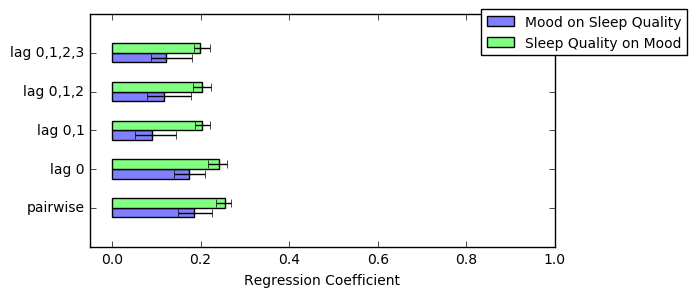

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,3))
plt.barh([0.75,1.75,2.75,3.75,4.75],np.concatenate([np.array([np.mean(beta_m2s_pw_mean)]),np.mean(beta_m2s_mean,axis=0)],axis=0).reshape([5,1]),xerr=np.array([\
    [np.mean(beta_m2s_pw_mean)-np.percentile(beta_m2s_pw_mean,2.5),np.percentile(beta_m2s_pw_mean,97.5)-np.mean(beta_m2s_pw_mean)],\
    [np.mean(beta_m2s_mean[:,0])-np.percentile(beta_m2s_mean[:,0],2.5),np.percentile(beta_m2s_mean[:,0],97.5)-np.mean(beta_m2s_mean[:,0])],\
    [np.mean(beta_m2s_mean[:,1])-np.percentile(beta_m2s_mean[:,1],2.5),np.percentile(beta_m2s_mean[:,1],97.5)-np.mean(beta_m2s_mean[:,1])],\
    [np.mean(beta_m2s_mean[:,2])-np.percentile(beta_m2s_mean[:,2],2.5),np.percentile(beta_m2s_mean[:,2],97.5)-np.mean(beta_m2s_mean[:,2])],\
    [np.mean(beta_m2s_mean[:,3])-np.percentile(beta_m2s_mean[:,3],2.5),np.percentile(beta_m2s_mean[:,3],97.5)-np.mean(beta_m2s_mean[:,3])]]).reshape(2,5),\
    ecolor=(0,0,0),height=.25,color=(.5,.5,1))
plt.barh([1,2,3,4,5],np.concatenate([np.array([np.mean(beta_s2m_pw_mean)]),np.mean(beta_s2m_mean,axis=0)],axis=0).reshape([5,1]),xerr=np.array([\
    [np.mean(beta_s2m_pw_mean)-np.percentile(beta_s2m_pw_mean,2.5),np.percentile(beta_s2m_pw_mean,97.5)-np.mean(beta_s2m_pw_mean)],\
    [np.mean(beta_s2m_mean[:,0])-np.percentile(beta_s2m_mean[:,0],2.5),np.percentile(beta_s2m_mean[:,0],97.5)-np.mean(beta_s2m_mean[:,0])],\
    [np.mean(beta_s2m_mean[:,1])-np.percentile(beta_s2m_mean[:,1],2.5),np.percentile(beta_s2m_mean[:,1],97.5)-np.mean(beta_s2m_mean[:,1])],\
    [np.mean(beta_s2m_mean[:,2])-np.percentile(beta_s2m_mean[:,2],2.5),np.percentile(beta_s2m_mean[:,2],97.5)-np.mean(beta_s2m_mean[:,2])],\
    [np.mean(beta_s2m_mean[:,3])-np.percentile(beta_s2m_mean[:,3],2.5),np.percentile(beta_s2m_mean[:,3],97.5)-np.mean(beta_s2m_mean[:,3])]]).reshape(2,5),\
    ecolor=(0,0,0),height=.25,color=(.5,1,.5))
plt.xlim([-.05,1])
plt.yticks([1,2,3,4,5],['pairwise', 'lag 0','lag 0,1','lag 0,1,2','lag 0,1,2,3'],rotation=0);
plt.xlabel('Regression Coefficient')
plt.legend(['Mood on Sleep Quality','Sleep Quality on Mood'],loc='upper right',bbox_to_anchor=(1.3, 1.05), fontsize=10);